In [1]:
import tensorflow as tf
from tensorflow import keras

/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(f'label: {train_labels[0]}')

label: 9


In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input shape of images
    keras.layers.Dense(512, activation=tf.nn.relu), # 128 nodes in hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # output layer consisting of 10 images
]) 
model.compile(optimizer=tf.train.AdamOptimizer(),
	      loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.4748
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.3567
Epoch 3/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.3180
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.2954
Epoch 5/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.2780
Epoch 6/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.2640
Epoch 7/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.2488
Epoch 8/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.2385
Epoch 9/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.2297
Epoch 10/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.2202


In [5]:
loss = model.evaluate(test_images, test_labels)
loss

10000/10000 [==============================] - 0s 30us/step


0.35510364429950714

Should be index 9 of [6.3520987e-11 1.4289936e-13 3.9377071e-13 1.1137133e-12 2.3298549e-11
 3.5574310e-06 6.2721304e-12 7.7268010e-04 1.4712320e-12 9.9922371e-01]


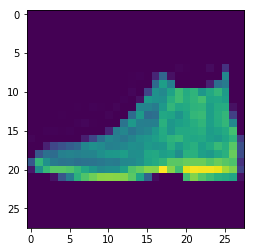

In [6]:
test_predictions = model.predict(test_images)
plt.imshow(test_images[0])
print(f'Should be index {test_labels[0]} of {test_predictions[0]}')